In [2]:
import pandas as pd

In [3]:
url='https://fbref.com/en/comps/9/stats/Premier-League-Stats'

In [4]:
df=pd.read_csv('football_data.csv',header=0)

In [5]:
df.columns=df.iloc[0,:] #resetting the headers using the first row

In [6]:
df=df.iloc[:,0:18] #obtaining the useful data 

In [7]:
columns=pd.DataFrame(df.columns,index=None)
expansions=['Rank','Player Name','Nationality','Position','Team Name', 'Age at the begining of the season','Year of Birth','Matches Played','Number of starts fot the team','Minutes PLayed','minutes played/90','Number of Goals', 'Number of assists','Non Penalty Goals','Penalty Kick Goals','Penalty Kicks Attempted','Yellow Cards','Red Cards']
columns['Description']=expansions
#the header names and acronyms are created using a seperate dataframe


In [8]:
columns=columns.rename(columns={0:'Acronyms'}) #column name is renamed

In [9]:
df=df.fillna(0)# replace all missing data with 0s

In [10]:
df=df.drop(['Rk'],axis=1) #dropping the  rank 

In [11]:
df.to_csv('EPL20.csv',index=False) 

In [12]:
df=pd.read_csv('EPL20.csv')

In [13]:
columns

,Acronyms,Description
0,Rk,Rank
1,Player,Player Name
2,Nation,Nationality
3,Pos,Position
4,Squad,Team Name
5,Age,Age at the begining of the season
6,Born,Year of Birth
7,MP,Matches Played
8,Starts,Number of starts fot the team
9,Min,Minutes PLayed


In [14]:
df = df.tail(df.shape[0] -1) #removing the first row using the tail function

In [15]:
df.iloc[:,6:].describe() #getting a description of the data 

,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR
count,532,532,532,532,532,532,532,532,532,532,532
unique,38,39,458,267,21,13,17,9,8,13,3
top,1,0,90,0.1,0,0,0,0,0,0,0
freq,41,55,10,14,261,284,267,489,483,174,485


In [16]:
df=df.astype({'MP':'int64','Starts':'int64','Min':'int64','90s':'float64','Gls':'int64','Ast':'int64','G-PK':'int64','PK':'int64','PKatt':'int64','CrdY':'int64','CrdR':'int64'})


In [17]:
df.loc[df.Gls==df.Gls.max()]# the player who scored the maximum goals

,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR
236,Harry Kane\Harry-Kane,eng ENG,FW,Tottenham,27,1993,35,35,3082,34.2,23,14,19,4,4,1,0


In [18]:
df.loc[df.Ast==df.Ast.max()] #player with max assists

,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR
236,Harry Kane\Harry-Kane,eng ENG,FW,Tottenham,27,1993,35,35,3082,34.2,23,14,19,4,4,1,0


In [19]:
df.loc[df.PK==df.PK.max()] #player with max penalties,scored 9/10 penalties

,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR
152,Bruno Fernandes\Bruno-Fernandes,pt POR,MF,Manchester Utd,25,1994,37,35,3099,34.4,18,12,9,9,10,6,0


In [22]:
df.Nation=df.Nation.str[3:]

In [24]:
df

,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR
1,Patrick van Aanholt\Patrick-van-Aanholt,NED,DF,Crystal Palace,29,1990,22,20,1777,19.7,0,1,0,0,0,2,0
2,Tammy Abraham\Tammy-Abraham,ENG,FW,Chelsea,22,1997,22,12,1040,11.6,6,1,6,0,0,0,0
3,Che Adams\Che-Adams,SCO,FW,Southampton,24,1996,36,30,2667,29.6,9,5,9,0,0,1,0
4,Tosin Adarabioyo\Tosin-Adarabioyo,ENG,DF,Fulham,22,1997,33,33,2953,32.8,0,0,0,0,0,1,0
5,Adrián\Adrian,ESP,GK,Liverpool,33,1987,3,3,270,3.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,Andi Zeqiri\Andi-Zeqiri,SUI,FWDF,Brighton,21,1999,9,0,171,1.9,0,0,0,0,0,0,0
529,Oleksandr Zinchenko\Oleksandr-Zinchenko,UKR,DF,Manchester City,23,1996,20,15,1478,16.4,0,0,0,0,0,0,0
530,Hakim Ziyech\Hakim-Ziyech,MAR,FWMF,Chelsea,27,1993,23,15,1172,13.0,2,3,2,0,0,3,0
531,Kurt Zouma\Kurt-Zouma,FRA,DF,Chelsea,25,1994,24,22,2029,22.5,5,0,5,0,0,3,0


In [26]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 285 kB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 28.4 MB 52 kB/s s eta 0:00:01     |█████████████▉                  | 12.3 MB 13.4 MB/s eta 0:00:02


In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df

,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR
1,Patrick van Aanholt\Patrick-van-Aanholt,NED,DF,Crystal Palace,29,1990,22,20,1777,19.7,0,1,0,0,0,2,0
2,Tammy Abraham\Tammy-Abraham,ENG,FW,Chelsea,22,1997,22,12,1040,11.6,6,1,6,0,0,0,0
3,Che Adams\Che-Adams,SCO,FW,Southampton,24,1996,36,30,2667,29.6,9,5,9,0,0,1,0
4,Tosin Adarabioyo\Tosin-Adarabioyo,ENG,DF,Fulham,22,1997,33,33,2953,32.8,0,0,0,0,0,1,0
5,Adrián\Adrian,ESP,GK,Liverpool,33,1987,3,3,270,3.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,Andi Zeqiri\Andi-Zeqiri,SUI,FWDF,Brighton,21,1999,9,0,171,1.9,0,0,0,0,0,0,0
529,Oleksandr Zinchenko\Oleksandr-Zinchenko,UKR,DF,Manchester City,23,1996,20,15,1478,16.4,0,0,0,0,0,0,0
530,Hakim Ziyech\Hakim-Ziyech,MAR,FWMF,Chelsea,27,1993,23,15,1172,13.0,2,3,2,0,0,3,0
531,Kurt Zouma\Kurt-Zouma,FRA,DF,Chelsea,25,1994,24,22,2029,22.5,5,0,5,0,0,3,0


In [35]:
#Top Nationalites in the Premier League
df.groupby('Nation').count()['Player'].head()

Nation
 ENG    192
 NIR      5
 SCO     20
 WAL     12
ALG       3
Name: Player, dtype: int64

In [63]:
df.groupby('Pos').Gls.describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
DF,178.0,0.724719,0.995786,0.0,0.0,0.0,1.00,5.0
DFFW,6.0,0.500000,0.547723,0.0,0.0,0.5,1.00,1.0
DFMF,15.0,0.733333,2.086236,0.0,0.0,0.0,0.00,8.0
FW,81.0,5.456790,5.709749,0.0,0.0,3.0,10.00,23.0
FWDF,6.0,1.333333,1.966384,0.0,0.0,0.5,1.75,5.0
FWMF,47.0,2.638298,2.816300,0.0,0.0,1.0,4.50,9.0
GK,42.0,0.023810,0.154303,0.0,0.0,0.0,0.00,1.0
MF,106.0,1.594340,2.920464,0.0,0.0,0.0,2.00,18.0
MFDF,13.0,1.076923,1.441153,0.0,0.0,1.0,1.00,5.0


# VISUALIZATION 

In [72]:
GLS=df[['Pos','Gls']]
positions=['MF','FW','MFFW']
GLS=GLS[GLS['Pos'].isin(positions)]

array([[<AxesSubplot:title={'center':'FW'}>,
        <AxesSubplot:title={'center':'MF'}>],
       [<AxesSubplot:title={'center':'MFFW'}>, <AxesSubplot:>]],
      dtype=object)

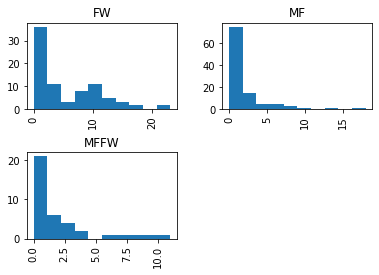

In [77]:
GLS.hist(by=GLS['Pos'])

In [81]:
MINS=df[['Squad','Min']]
Teams=['Manchester City','Manchester United','Chelsea','Tottenham','Leicester','Liverpool']
MINS=MINS[MINS['Squad'].isin(Teams)]

<AxesSubplot:title={'center':'Min'}, xlabel='Squad'>

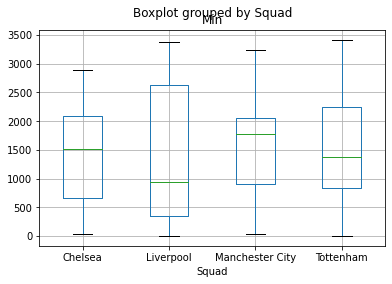

In [84]:
MINS.boxplot(column='Min',by='Squad')

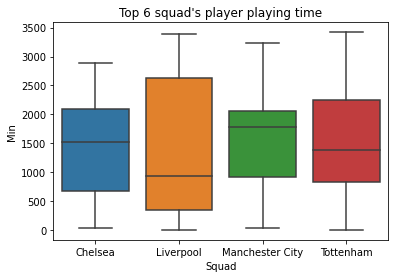

In [208]:
sns.boxplot(x='Squad',y='Min',data=MINS)
plt.title("Top 6 squad's player playing time")
plt.savefig('bplot.png')

In [146]:
age=df[['Age','Min']]

In [147]:
age.sort_values(by='Age',inplace=True)

age.reset_index(inplace=True)

age.Age.astype('int64')


/home/adi/.local/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


0       0
1      16
2      16
3      16
4      16
       ..
527    35
528    36
529    36
530    37
531    38
Name: Age, Length: 532, dtype: int64

In [163]:
age

,Age,Min
0,0,1
1,16,11
2,16,11
3,16,1
4,16,20
...,...,...
527,35,1935
528,36,767
529,36,18
530,37,526


In [149]:
age.drop(columns='index',inplace=True)

/home/adi/.local/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [152]:
age.Age=age.Age.astype('int64')

/home/adi/.local/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [154]:
age.dtypes

Age    int64
Min    int64
dtype: object

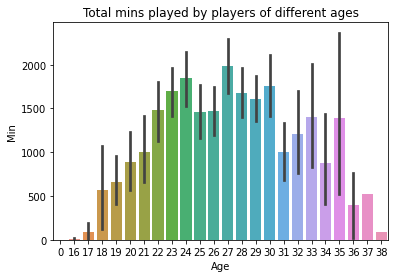

In [193]:
ax=sns.barplot(x='Age',y='Min',data=age)
ax.set_title('Total mins played by players of different ages')
plt.savefig('Age vs mins.png')

In [156]:
import numpy as np

In [157]:
a=list(age.Age.astype(int).unique())

In [158]:
np.histogram(a,bins=5)

(array([1, 0, 7, 8, 8]), array([ 0. ,  7.6, 15.2, 22.8, 30.4, 38. ]))

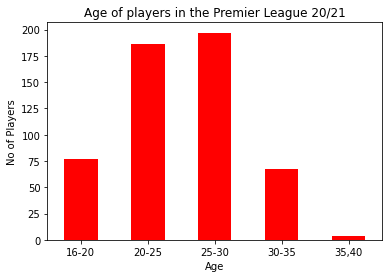

<Figure size 432x288 with 0 Axes>

In [194]:
out = pd.cut(df.Age.astype(int), bins=[16,20,25,30,35,40], include_lowest=True)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="r", figsize=(6,4))
plt.xlabel('Age')
plt.ylabel('No of Players')
plt.title('Age of players in the Premier League 20/21')
ax.set_xticklabels(['16-20','20-25','25-30','30-35','35,40'])
plt.show()
plt.savefig('PL player age')

In [195]:
corr=df.corr()

<AxesSubplot:>

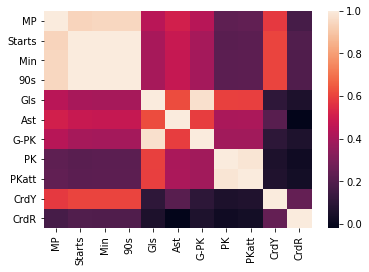

In [196]:
sns.heatmap(corr)

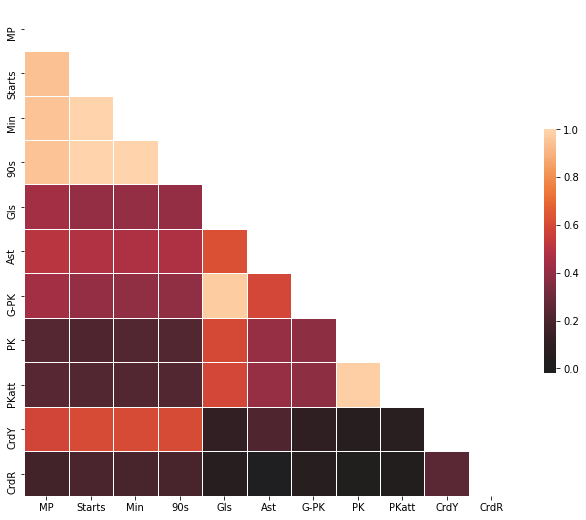

<Figure size 432x288 with 0 Axes>

In [204]:
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()
plt.savefig("Heatmap.png")